In [15]:
if 'libraries_imported' not in globals():
    libraries_imported = False

if libraries_imported == False:
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import os
    from datetime import datetime, timedelta
    from datetime import datetime
    from scipy.interpolate import make_interp_spline
    import plotly.graph_objects as go
    from scipy.signal import butter, filtfilt
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    from sklearn.preprocessing import StandardScaler
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense
    from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
    from keras_tuner import RandomSearch, HyperModel
    import numpy as np
    import pandas as pd
    from sklearn.preprocessing import StandardScaler
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import LSTM, Dense
    from tensorflow.keras.callbacks import EarlyStopping
    from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
    from keras_tuner import RandomSearch, HyperModel
    from tensorflow.keras.layers import Input
    import sys
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestRegressor
    import numpy as np
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from sklearn.preprocessing import RobustScaler
    import tensorflow as tf
    from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
    from sklearn.preprocessing import RobustScaler
    import joblib

In [16]:
title = 'datasets/SaniWASE_Data_Cleaned_t1.csv'  # Ensure the file name includes .csv
feed_analysis_df = pd.read_csv(title)  # Load the CSV file

if not isinstance(feed_analysis_df.columns[0], str):
    new_header = feed_analysis_df.iloc[0]  # This grabs the first row for the header
    feed_analysis_df = feed_analysis_df[1:]  # Take the data less the header row
    feed_analysis_df.columns = new_header  # Set the header row as the DataFrame header

# Remove duplicate indices if they exist
feed_analysis_df = feed_analysis_df[~feed_analysis_df.index.duplicated(keep='first')]

# Convert 'datetime' column to datetime format
feed_analysis_df['datetime'] = pd.to_datetime(feed_analysis_df['datetime'], format='%d.%m.%y', errors='raise')
feed_analysis_df['date'] = feed_analysis_df['datetime'].dt.date

# Optional: apply_date_range_df function can be defined and used here if needed
# df = apply_date_range_df(df)

# Sorting values by date
feed_analysis_df = feed_analysis_df.sort_values(by='date')

# Drop specified columns
columns_to_drop = ['datetime', 'fos', 'tac', 'index', 'fos', 'tac', 'f/m_ratio',  't1_olr', 'eq_cod', 't1_cod', 'h2s_ppm']
feed_analysis_df = feed_analysis_df.drop(columns=columns_to_drop)


display(feed_analysis_df.columns)






Index(['eq_ph', 'feed_vol', 't1_ph', 'current', 'temp', 'methane_percentage',
       'hrt', 'biogas_vol', 'fostac', 'date'],
      dtype='object')

In [17]:
df = feed_analysis_df.copy()
df.set_index('date', inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')
df.reset_index(inplace=True)
# df.dropna(inplace=True)





df_interpolated = df.interpolate(method = 'ffill')


# df_interpolated = df.copy()

/tmp/ipykernel_14297/597086371.py:11: FutureWarning: DataFrame.interpolate with method=ffill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_interpolated = df.interpolate(method = 'ffill')


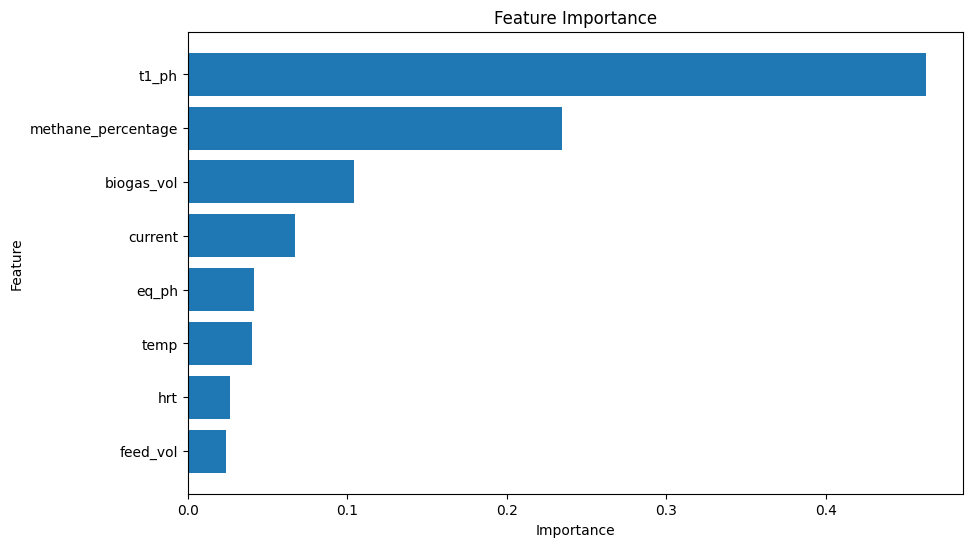

In [18]:

# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt




# Prepare the data
# Dropping the 'fostac' and 'date' columns to isolate the features
X = df_interpolated.drop(['fostac', 'date'], axis=1)
y = df_interpolated['fostac']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeling
# Initialize and train the Random Forest regressor
model = RandomForestRegressor(n_estimators=300, random_state=42)
model.fit(X_train, y_train)

# Feature importance analysis
# Extract feature importances from the model
importances = model.feature_importances_
features = X_train.columns


# Sorting the features by importance
indices = np.argsort(importances)  # Get the indices of sorted importances
sorted_features = [features[i] for i in indices]  # Reorder the features
sorted_importances = importances[indices]  # Reorder the importances

# Create the plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()



In [22]:

df_interpolated  = df_interpolated[['fostac', 'date', 't1_ph', 'biogas_vol']]
display(df_interpolated)

,fostac,date,t1_ph,biogas_vol
0,0.53,2022-06-07,7.10,1232.0
1,0.34,2022-06-08,7.20,1019.0
2,0.15,2022-06-09,7.30,1005.0
3,0.19,2022-06-10,7.30,892.0
4,0.19,2022-06-11,7.30,1100.0
...,...,...,...,...
139,0.37,2022-10-24,7.24,2142.0
140,0.37,2022-10-25,7.24,1538.5
141,0.40,2022-10-26,7.03,1538.5
142,0.40,2022-10-27,7.03,2856.5


In [20]:
import numpy as np
import pandas as pd
import tensorflow as tf
import random
import os
import json
import joblib
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from keras_tuner import RandomSearch, HyperModel
from tensorflow.keras.callbacks import EarlyStopping

# Set seeds for reproducibility
seed = 42
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

# Data preparation (assuming df_interpolated is defined previously)
df = df_interpolated.copy()
target = 'fostac'
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.dropna(subset=[target], inplace=True)
num_features = df.shape[1] - 1

scaler = RobustScaler()
X = df.drop(columns=[target])
y = df[target]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=seed
)
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Save scaler
scaler_path = os.path.join('ANN_hyperparams', 'robust_scaler.pkl')
os.makedirs('ANN_hyperparams', exist_ok=True)
joblib.dump(scaler, scaler_path)

# Define shallow neural network hyperparameter tuning
class ShallowModel(HyperModel):
    def build(self, hp):
        model = Sequential()
        model.add(Input(shape=(num_features,)))

        # Shallow network: maximum 2 hidden layers
        num_layers = hp.Int('num_layers', 1, 2)
        for i in range(num_layers):
            model.add(Dense(hp.Int(f'units_{i}', 16, 64, 16), activation='relu'))
            if hp.Boolean(f'batch_norm_{i}', default=False):
                model.add(BatchNormalization())
            if hp.Boolean(f'dropout_{i}', default=False):
                model.add(Dropout(hp.Float(f'dropout_rate_{i}', 0.1, 0.5, 0.1)))

        model.add(Dense(1, activation='linear'))  # Regression output
        model.compile(
            optimizer=Adam(hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')),
            loss='mae',
            metrics=['mae']
        )
        return model

# Early stopping
early_stopping = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)

# Hyperparameter tuning with RandomSearch
shallow_tuner = RandomSearch(
    ShallowModel(),
    objective='val_mae',
    max_trials=1,
    executions_per_trial=2,
    directory=os.path.join('ANN_hyperparams', 'shallow_tuner'),
    project_name='shallow_mec_ad_model',
    seed=seed,
    overwrite=True
)

# Start shallow hyperparameter search
shallow_tuner.search(
    X_train_scaled, y_train,
    epochs=100,
    validation_data=(X_val_scaled, y_val),
    batch_size=16,
    callbacks=[early_stopping],
    verbose=1
)

# Retrieve and explicitly build best shallow model
best_hp = shallow_tuner.get_best_hyperparameters(num_trials=1)[0]
best_shallow_model = ShallowModel().build(best_hp)

# Retrain best shallow model explicitly on the training data
history = best_shallow_model.fit(
    X_train_scaled, y_train,
    epochs=100,
    validation_data=(X_val_scaled, y_val),
    batch_size=16,
    callbacks=[early_stopping],
    verbose=1
)

# Save best hyperparameters
hyperparams_path = os.path.join('ANN_hyperparams', 'best_shallow_hyperparameters.json')
with open(hyperparams_path, 'w') as hp_file:
    json.dump(best_hp.values, hp_file, indent=4)

# Save the final shallow model
model_path = os.path.join('ANN_hyperparams', 'best_shallow_model.keras')
best_shallow_model.save(model_path)

Trial 1 Complete [00h 00m 05s]
val_mae: 0.1205153539776802

Best val_mae So Far: 0.1205153539776802
Total elapsed time: 00h 00m 05s
Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.3366 - mae: 0.3366 - val_loss: 0.1885 - val_mae: 0.1885
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1536 - mae: 0.1536 - val_loss: 0.1650 - val_mae: 0.1650
Epoch 3/100


2025-03-13 21:24:03.682193: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1195 - mae: 0.1195 - val_loss: 0.1413 - val_mae: 0.1413
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1087 - mae: 0.1087 - val_loss: 0.1280 - val_mae: 0.1280
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0929 - mae: 0.0929 - val_loss: 0.1246 - val_mae: 0.1246
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0900 - mae: 0.0900 - val_loss: 0.1409 - val_mae: 0.1409
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0916 - mae: 0.0916 - val_loss: 0.1296 - val_mae: 0.1296
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1011 - mae: 0.1011 - val_loss: 0.1233 - val_mae: 0.1233
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0913 - mae: 0.0913 - val_loss: 0.1357 - val_mae: 0.1357
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0873 - mae: 0.0873 - val_loss: 0.1340 - val_mae: 0.1340
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0873 - mae: 0.0873 - val_loss: 

In [21]:
# Save the best model explicitly
model_save_path = 'ANN_hyperparams/best_model.keras'
best_shallow_model.save(model_save_path)

# Evaluate best model
y_pred = best_shallow_model.predict(X_val_scaled).flatten()
mae = np.mean(np.abs(y_val - y_pred))
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
# explained_variance = explained_variance_score(y_val, y_pred)
nrmse = rmse / np.std(y_val)

# Print evaluation metrics
print(f'MAE: {mae:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'NRMSE: {nrmse:.4f}')
# print(f'Explained Variance: {explained_variance:.4f}')

# Create figures directory
figures_folder = 'ANN_hyperparams/figures'
os.makedirs(figures_folder, exist_ok=True)


results_df = pd.DataFrame({
    'true': y_val,
    'predicted': y_pred
}, index=y_val.index).sort_index()
results_df.reset_index(inplace=True)


# Scatter plot of true vs predicted values
plt.figure(figsize=(8, 8))
plt.scatter(results_df['true'], results_df['predicted'], alpha=0.6)

# Reference line for ideal predictions
max_val = max(results_df['true'].max(), results_df['predicted'].max())
min_val = min(results_df['true'].min(), results_df['predicted'].min())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)

# Labels and title
plt.title('Predicted vs True Values')
plt.xlabel('True Values (fostac)')
plt.ylabel('Predicted Values (fostac)')
plt.grid(True)

# Save figure
fig_path = os.path.join(figures_folder, 'validation_results_true_vs_pred.png')
plt.savefig(fig_path)
plt.show
plt.close()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
MAE: 0.1212
RMSE: 0.1765
NRMSE: 0.7549
